<a href="https://colab.research.google.com/github/asif-ethmoid/ASIF.github.io/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np


In [46]:
df = pd.read_csv("/content/train.csv")

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
def preprocess(df):
    df = df.copy()
    def ticket_items(x):
        items = x.split(" ")
        if len(items) == 1:
            return "None"
        return " ".join(items[0:-1])
    def ticket_num(x):
        return x.split(" ")[-1]

    def cabin(x):
        return " ".join(x.split(" "))[0:1]
    def item(x):
        return " ".join(v.replace(".", "").replace("/", "") for v in x.split(" "))[0:3]

    def num(x):
        return " ".join(v.replace("LINE", "0") for v in x.split(" "))

    def age(x):
        if x < 10:
            return "0"
        elif x < 20:
            return "10"
        elif x < 30:
            return "20"
        elif x < 40:
            return "30"
        elif x < 50:
            return "40"
        elif x < 60:
            return "50"
        elif x < 70:
            return "60"
        elif x < 80:
            return "70"
        elif x < 90:
            return "80"
        elif x < 100:
            return "90"
        else:
            return "100"


    def normalize_name(x):
        return " ".join(v.strip("./"'()[]'"") for v in x.split(" "))

    def name(x):
        if any (title in x for title in ["Mrs", "Miss", "Ms", "Mme", "Mile"]):
            return "Mrs/Miss"

        elif "Mr" in x:
            return "Mr"
        elif "Master" in x:
            return "Master"
        else:
            return "others"

    def len_name(x):
        return len(" ".join(x.split(" ")))



    df["Ticket_items"] = df["Ticket"].apply(ticket_items)
    df["Ticket_number"] = df["Ticket"].apply(ticket_num)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    df["Cabin"] = df["Cabin"].fillna("None")
    df["Cabin"] = df["Cabin"].apply(cabin)
    df["Ticket_items"] = df["Ticket_items"].apply(item)
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Ticket_number"] = df["Ticket_number"].apply(num)
    df["Ticket_number"] = df["Ticket_number"].astype(int)
    df["Age_categorical"] = df["Age"].apply(age)
    df["Age_categorical"] = df["Age_categorical"].astype(int)
    df["Family"] = (df["SibSp"] + df["Parch"] + 1)
    df["Len_Name"] = df["Name"].apply(len_name)
    df["Name"] = df["Name"].apply(normalize_name)
    df["Title"] = df["Name"].apply(name)
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    df["Categorical_Fare"] = pd.qcut(df["Fare"] / df["Family"], 4, labels = ["Low", "Mid", "High", "VeryHigh"])
    df["Categorical_Fare"] = df["Categorical_Fare"].map({"Low": 1, "Mid": 2, "High": 3, "VeryHigh": 4}).astype(int)
    df = df.drop("Name", axis = 1)
    df = df.drop("Age", axis = 1)
    df = df.drop("Ticket", axis = 1)



    cols = ("Embarked", "Cabin", "Ticket_items", "Title")
    for c in cols:
        lb = LabelEncoder()
        lb.fit(df[c].values)
        df[c] = lb.transform(list(df[c].values))
        df[c] = df[c].astype(int)

    return df
def preprocess(df):
    df = df.copy()
    def ticket_items(x):
        items = x.split(" ")
        if len(items) == 1:
            return "None"
        return " ".join(items[0:-1])
    def ticket_num(x):
        return x.split(" ")[-1]

    def cabin(x):
        return " ".join(x.split(" "))[0:1]
    def item(x):
        return " ".join(v.replace(".", "").replace("/", "") for v in x.split(" "))[0:3]

    def num(x):
        return " ".join(v.replace("LINE", "0") for v in x.split(" "))

    def age(x):
        if x < 10:
            return "0"
        elif x < 20:
            return "10"
        elif x < 30:
            return "20"
        elif x < 40:
            return "30"
        elif x < 50:
            return "40"
        elif x < 60:
            return "50"
        elif x < 70:
            return "60"
        elif x < 80:
            return "70"
        elif x < 90:
            return "80"
        elif x < 100:
            return "90"
        else:
            return "100"


    def normalize_name(x):
        return " ".join(v.strip("./"'()[]'"") for v in x.split(" "))

    def name(x):
        if any (title in x for title in ["Mrs", "Miss", "Ms", "Mme", "Mile"]):
            return "Mrs/Miss"

        elif "Mr" in x:
            return "Mr"
        elif "Master" in x:
            return "Master"
        else:
            return "others"

    def len_name(x):
        return len(" ".join(x.split(" ")))



    df["Ticket_items"] = df["Ticket"].apply(ticket_items)
    df["Ticket_number"] = df["Ticket"].apply(ticket_num)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    df["Cabin"] = df["Cabin"].fillna("None")
    df["Cabin"] = df["Cabin"].apply(cabin)
    df["Ticket_items"] = df["Ticket_items"].apply(item)
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Ticket_number"] = df["Ticket_number"].apply(num)
    df["Ticket_number"] = df["Ticket_number"].astype(int)
    df["Age_categorical"] = df["Age"].apply(age)
    df["Age_categorical"] = df["Age_categorical"].astype(int)
    df["Family"] = (df["SibSp"] + df["Parch"] + 1)
    df["Len_Name"] = df["Name"].apply(len_name)
    df["Name"] = df["Name"].apply(normalize_name)
    df["Title"] = df["Name"].apply(name)
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    df["Categorical_Fare"] = pd.qcut(df["Fare"] / df["Family"], 4, labels = ["Low", "Mid", "High", "VeryHigh"])
    df["Categorical_Fare"] = df["Categorical_Fare"].map({"Low": 1, "Mid": 2, "High": 3, "VeryHigh": 4}).astype(int)
    df = df.drop("Name", axis = 1)
    df = df.drop("Age", axis = 1)
    df = df.drop("Ticket", axis = 1)



    cols = ("Embarked", "Cabin", "Ticket_items", "Title")
    for c in cols:
        lb = LabelEncoder()
        lb.fit(df[c].values)
        df[c] = lb.transform(list(df[c].values))
        df[c] = df[c].astype(int)

    return df

df = preprocess(df)


In [49]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Ticket_items,Ticket_number,Age_categorical,Family,Len_Name,Title,Categorical_Fare
0,1,0,3,0,1,0,7.2500,7,2,1,21171,20,2,23,1,1
1,2,1,1,1,1,0,71.2833,2,0,10,17599,30,2,51,2,4
2,3,1,3,1,0,0,7.9250,7,2,21,3101282,20,1,22,2,2
3,4,1,1,1,1,0,53.1000,2,2,9,113803,30,2,44,2,4
4,5,0,3,0,0,0,8.0500,7,2,9,373450,30,1,24,1,2


In [50]:
X = df.drop(df.columns[1], axis=1)
Y = df.iloc[:, 1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

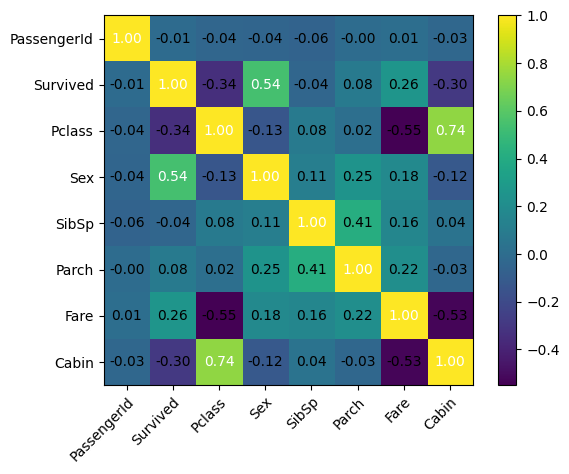

In [51]:
from mlxtend.plotting import heatmap
cols1 = ["PassengerId","Survived","Pclass","Sex","SibSp","Parch","Fare","Cabin"]
cm = np.corrcoef(df[cols1].values.T)
hm = heatmap(cm, row_names=cols1, column_names=cols1)
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression  # Use classifier instead
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Convert Y_train into categorical values if needed
# Example: Convert continuous values into binary classes (e.g., thresholding)
# Y_train = (Y_train > threshold).astype(int)

clf = LogisticRegression()  # Use a classification model
clf.fit(X_train, Y_train)   # Train the model

Y_pred_clf = clf.predict(X_test)  # Make predictions

# Create results DataFrame
results = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_pred_clf
})

# Print first 200 results
print(results.head(200))

# Evaluate model performance
print("\nAccuracy Score:", accuracy_score(Y_test, Y_pred_clf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_clf))


     Actual  Predicted
590       0          0
131       0          0
628       0          0
195       1          1
230       1          1
..      ...        ...
456       0          0
191       0          0
603       0          0
94        0          0
766       0          0

[179 rows x 2 columns]

Accuracy Score: 0.7597765363128491

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       117
           1       0.81      0.40      0.54        62

    accuracy                           0.76       179
   macro avg       0.78      0.68      0.69       179
weighted avg       0.77      0.76      0.73       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:


# Load the test dataset
test_df = pd.read_csv("/content/test.csv")  # Replace with your actual file path

# Ensure the test dataset has the same features as the training data
X_test_new =preprocess(test_df)   # Adjust if necessary (e.g., dropping unwanted columns)

# Make predictions using the trained model
Y_pred_new = clf.predict(X_test_new)  # Use your trained classifier

# Create the submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],  # Keep original PassengerId
    "Survived": Y_pred_new  # Model predictions (0 or 1)
})

# Save predictions to CSV
submission.to_csv("predictions.csv", index=False)

print("Predictions saved to 'predictions.csv'.")
print(submission.head(20))  # Display first 10 predictions


Predictions saved to 'predictions.csv'.
    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         0
5           897         0
6           898         0
7           899         0
8           900         0
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         0
15          907         0
16          908         0
17          909         0
18          910         0
19          911         0


In [54]:
pip install catboost


In [55]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize CatBoost Classifier
clf = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.05, loss_function='Logloss', verbose=100)

# Train the model
clf.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=50)

# Make predictions on test set
Y_pred = clf.predict(X_test)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# Load test dataset for final prediction (assuming test.csv has similar structure)
test_df = pd.read_csv("test.csv")

# Drop the same column as in training
X_test_new =preprocess(test_df)

# Predict on new test data
Y_pred_new = clf.predict(X_test_new)

# Save predictions in required format
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],  # Adjust if PassengerId exists
    "Survived": Y_pred_new.astype(int)  # Ensure integer output
})

# Save to CSV
submission.to_csv("predictions.csv", index=False)

print("\nPredictions saved to 'predictions.csv'.")
print(submission.head(20))  # Show first 10 rows of results


0:	learn: 0.6680277	test: 0.6636049	best: 0.6636049 (0)	total: 2.03ms	remaining: 1.01s
100:	learn: 0.2916943	test: 0.3442017	best: 0.3431813 (97)	total: 165ms	remaining: 653ms
200:	learn: 0.2122950	test: 0.3320650	best: 0.3315196 (195)	total: 321ms	remaining: 478ms
300:	learn: 0.1480007	test: 0.3288047	best: 0.3282684 (255)	total: 476ms	remaining: 315ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3282684004
bestIteration = 255

Shrink model to first 256 iterations.

Accuracy Score: 0.8659217877094972

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       117
           1       0.83      0.77      0.80        62

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179


Predictions saved to 'predictions.csv'.
    PassengerId  Survived
0           892         0
1           893         0

In [56]:
from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>